In [1]:
import pandas as pd
import joblib

In [2]:
data = pd.read_csv('../data/raw/creditcard.csv') #Load the data
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Basic info about the dataset
# print(data.info())
# print(data.describe())
print(data['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


In [4]:
print(data.isnull().sum()) #Check for missing values
data.dropna(inplace=True) #Drop missing values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


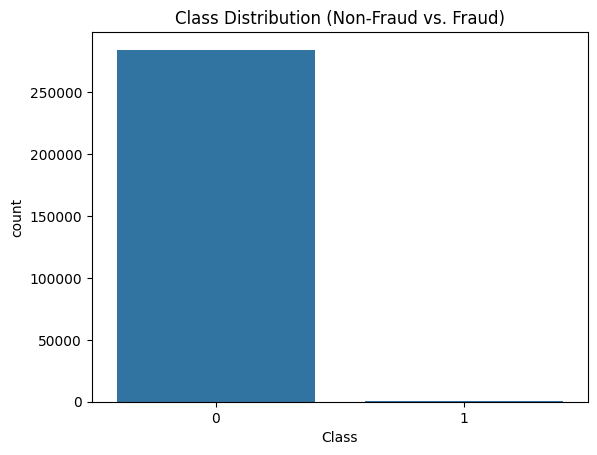

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Class', data=data) #Visualize the class distribution
plt.title('Class Distribution (Non-Fraud vs. Fraud)')
plt.show()


In [6]:
from sklearn.preprocessing import StandardScaler

# Scale the Amount column
scaler = StandardScaler() #Instantiate the scaler
data['scaled_amount'] = scaler.fit_transform(data[['Amount']]) #Fit and transform the data

# Drop the original Amount column
data.drop('Amount', axis=1, inplace=True) 

joblib.dump(scaler, '../models/scaler.pkl')

['../models/scaler.pkl']

In [7]:
from sklearn.model_selection import train_test_split

# Features (X) and target (y)
X = data.drop('Class', axis=1)
y = data['Class']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced') #Instantiate the model
model.fit(X_train, y_train) #Train the model

c:\Users\Andrew Hing\OneDrive\Desktop\VSCode\Projects\Fraud Detection\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred_lr = model.predict(X_test) #Make predictions

print(accuracy_score(y_test, y_pred_lr)) #Print the accuracy
print(confusion_matrix(y_test, y_pred_lr)) #Print the confusion matrix
#[TN, FP]
#[FN, TP]
print(classification_report(y_test, y_pred_lr)) #Print the classification report

# accuracy = (TP + TN) / (TP + TN + FP + FN)
# precision = TP / (TP + FP)
# recall = TP / (TP + FN)


0.9627646501176222
[[54751  2113]
 [    8    90]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.92      0.08        98

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.96      0.98     56962



In [10]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(class_weight='balanced') #Instantiate the model
rf_model.fit(X_train, y_train) #Train the model

RandomForestClassifier(class_weight='balanced')

In [11]:
y_pred_rf = rf_model.predict(X_test) #Make predictions

print(accuracy_score(y_test, y_pred_rf)) #Print the accuracy
print(confusion_matrix(y_test, y_pred_rf)) #Print the confusion matrix
print(classification_report(y_test, y_pred_rf)) #Print the classification report

0.9994908886626171
[[56860     4]
 [   25    73]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.74      0.83        98

    accuracy                           1.00     56962
   macro avg       0.97      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [12]:
joblib.dump(rf_model, '../models/creditcard_model.pkl')  # Save the model to a file

['../models/creditcard_model.pkl']